## Bulk Metallic Glass Metal Matrix Composites
### Introduction
This example uses a data set from directionally aligned BMG-MMC. The high yield strength as well as high elastic strain limits observed from amorphous glasses are of interest in multiple applications. However, the low ductility and fatigue strength of such metals mitigates their use in design critical components. For these practical purposes, metal composites composed of amorphous and crystalline phases have become a pursuit. 

The BMG-MMC in this data set is directionally solidified BMG-MMC which through the use of electromagnets the crystalline phases are aligned within the amorphous matrix. In this example we will be applying commons tools used throughout PyMKS in order to classify the micostructures and hopefully observe degrees of anisotropy throughout the microstructures.


### Load in the Data
The data for this example is located on servers within the Georgia Tech and a VPN connection must be established in order to access the data.  

In [14]:
from pymks_share import DataManager
manager=DataManager('pymks.me.gatech.edu')
X=manager.fetch_data('metallic glass')
meta=manager.fetch_metadata('metallic glass')


### Back the data up
Now that we have the data we can dump the data into a backup save, this way we can load the data later without having to use a VPN.

In [15]:
import cPickle as pickle
pickle.dump(X, open("databackup.p",'wb') )
pickle.dump(meta, open("metabackup.p",'wb') )

In [1]:
import cPickle as pickle
X=pickle.load(open("databackup.p",'rb'))
meta=pickle.load(open("metabackup.p",'rb'))

### Lets look at the Microstructure
Below we can see one of the microstructures. We can easily discern the phases of the 

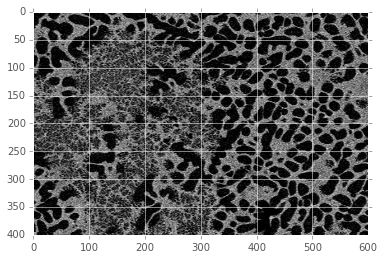

In [63]:
plt.imshow(X[40][0:400,0:600], cmap='gray')
plt.show()


In [58]:
X.shape

(54L, 480L, 640L)

In [2]:
import numpy as np
from skimage.filters import threshold_otsu, rank
particles=np.zeros([X.shape[0],400,600], dtype=int)
j=0
for x in X:
    temp=x[0:400,0:600]
    threshold=threshold_otsu(temp)
    out=temp>threshold
    particles[j,:,:]=out
    j=j+1
print

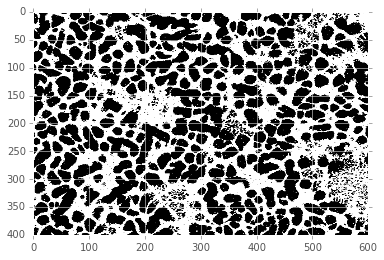

In [38]:
out.shape
import matplotlib.pylab as plt
%matplotlib inline
plt.imshow(particles[15], cmap='gray')
plt.show()

In [5]:
from pymks.stats import autocorrelate
from pymks import PrimitiveBasis


prim_basis = PrimitiveBasis(n_states=2)
X_ = prim_basis.discretize(particles)
X_auto = autocorrelate(X_, periodic_axes=(0, 1))

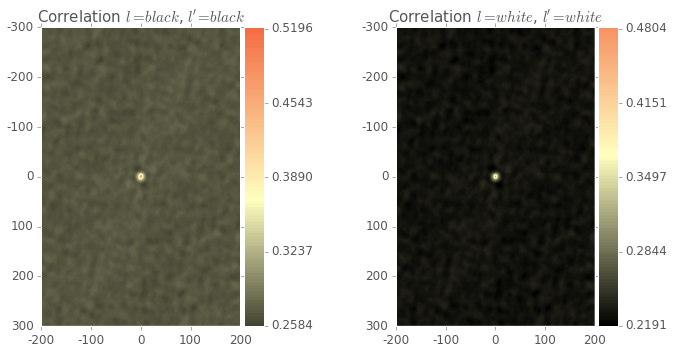

In [41]:
from pymks.tools import draw_autocorrelations

correlations = [('black', 'black'), ('white', 'white')]
draw_autocorrelations(X_auto[8], autocorrelations=correlations)

In [7]:
center = (X_auto.shape[1] + 1) / 2
print 'Volume fraction of black phase', X_auto[0, center, center, 0]
print 'Volume fraction of white phase', X_auto[0, center, center, 1]


Volume fraction of black phase 0.256166669515
Volume fraction of white phase 0.250450002784


In [8]:
from pymks.stats import crosscorrelate

X_cross = crosscorrelate(X_, periodic_axes=(0, 1))

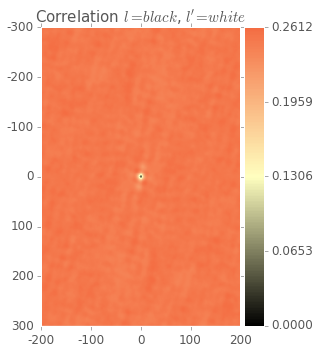

In [9]:
from pymks.tools import draw_crosscorrelations

correlations = [('black', 'white')]
draw_crosscorrelations(X_cross[0], crosscorrelations=correlations)

In [10]:
print 'Center value', X_cross[0, center, center, 0]

Center value 0.246691669409


## Data Reductive Techniques
We now have a huge data set! We could either compare each and every 2-pt statistics to each other or we could use data reduction techniques in a way to look at the data sets as a whole.

In [11]:
from pymks import MKSStructureAnalysis
from pymks.stats import correlate
from sklearn.base import BaseEstimator
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import ProjectedGradientNMF
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FastICA
from sklearn.decomposition import fastica

In [56]:
analyzer = MKSStructureAnalysis(prim_basis, dimension_reducer = RandomizedPCA( n_components=3), mean_center=True)

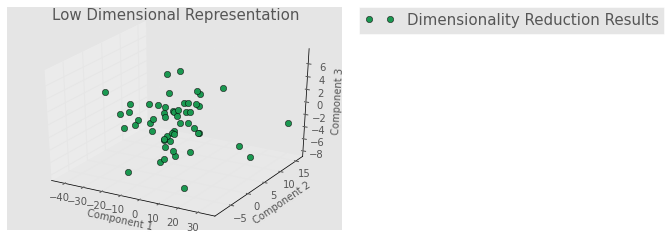

In [64]:
from pymks.tools import draw_components

draw_components([analyzer.fit_transform(out)[:, :3]],
                ['Dimensionality Reduction Results'])

In [57]:
from pymks.tools import draw_component_variance

draw_component_variance(analyzer.dimension_reducer.explained_variance_ratio_)

AttributeError: 'RandomizedPCA' object has no attribute 'explained_variance_ratio_'